# CartPole solution using Random Search

Here we will be looking a very simple solution for Open AI's CartPole environment by simply doing a random search of a linear model. We will take our state and apply a weight to it. If this outcome is greater than 0 we will move in one direction, less than 0 and we move in the other.



<h2>Implimentation</h2>

First we will add in our helper methods for carrying out the search.

getAction: takes in the vector of weights and applies them to the current state. It then returns the desired action based on the dot product


In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def get_action(s,w):
    return 1 if s.dot(w) > 0 else 0


play_one_episode: 

It takes in environment, a set of parameters and a boolean to turn indicate whether or not to play a video of the training. When this is turned on it slows down the code a lot so we only use it to view the final episode and see how well it does.Next, Carry out 200 iterations(time frames) and apply the get_action method to play the episode with the current set of parameters. After an action update the key information such as observation, reward, done and info.


In [3]:
def play_one_episode(env, params, render):
    
    observation = env.reset()
    done = False
    t = 0
    
    while t < 200 and not done:
        
        if render:
            env.render()
            
        t += 1
        action = get_action(observation, params)
        observation, reward, done, info = env.step(action)
        
        if done:
            break
            
    return t


play_multiple_episodes:

This will be the main training loop. This will simply run the previous method for T times. We also have an episode lengths array that will keep track of how many time frames our cart pole is lasting. The goal is for the cart pole to last for the entire 200 time frames of the episode. At the end we output the average time the cart pole is staying up

In [4]:
def play_multiple_episodes(env, T, params):
    episode_lengths = np.empty(T)
    
    for i in range(T):
        episode_lengths[i] = play_one_episode(env, params, False)
    
    avg_length = episode_lengths.mean()
    print("avg length:", avg_length)
    return avg_length


Now for the fun part, the search algorithm. Firstly, we want to keep track of the episode lengths, the best length so far and the current parameters. Then we will run 100 episodes. For each new episode we will generate a new random set of parameters (weights) and see how it gets on. If the average length of the current batch of episodes with the new random parameters is better than the previous ones, we will update our best parameters. After 100 episodes we will hopefully have discovered a good set of parameters that can keep the cart pole upright for the 200 time frames of an episode purly through exploration.

In [5]:
def random_search(env):
    episode_lengths = []
    best = 0 
    params = None
    
    for i in range(100):
        new_params = np.random.random(4)*2 - 1
        avg_length = play_multiple_episodes(env, 100, new_params)
        episode_lengths.append(avg_length)
        
        if avg_length > best:
            params = new_params
            best = avg_length
            
    return episode_lengths, params


Finally we will add our main section. Here we will call everything and run a final episode when we get the results of our random search to test its efficiency

[2017-09-29 12:34:09,802] Making new env: CartPole-v0


('avg length:', 8.7799999999999994)
('avg length:', 37.210000000000001)
('avg length:', 14.279999999999999)
('avg length:', 100.76000000000001)
('avg length:', 9.4700000000000006)
('avg length:', 69.689999999999998)
('avg length:', 9.1099999999999994)
('avg length:', 9.0700000000000003)
('avg length:', 109.65000000000001)
('avg length:', 42.240000000000002)
('avg length:', 25.309999999999999)
('avg length:', 9.1799999999999997)
('avg length:', 9.4700000000000006)
('avg length:', 99.530000000000001)
('avg length:', 200.0)
('avg length:', 9.3100000000000005)
('avg length:', 48.439999999999998)
('avg length:', 9.8300000000000001)
('avg length:', 55.259999999999998)
('avg length:', 93.209999999999994)
('avg length:', 43.630000000000003)
('avg length:', 64.140000000000001)
('avg length:', 37.909999999999997)
('avg length:', 33.079999999999998)
('avg length:', 9.4900000000000002)
('avg length:', 9.5199999999999996)
('avg length:', 28.800000000000001)
('avg length:', 42.979999999999997)
('avg

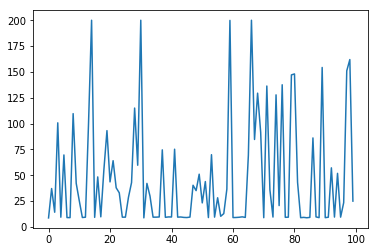

***Final run with final weights***


In [6]:
if __name__ == '__main__':
  env = gym.make('CartPole-v0')
  episode_lengths, params = random_search(env)
  plt.plot(episode_lengths)
  plt.show()

  # play a final set of episodes
  print("***Final run with final weights***")
  play_one_episode(env, params, True)


This example is based off the lessons provided by the Lazy Programmers course Advanced AI:Deep Reinforcement Learning. 
https://www.udemy.com/deep-reinforcement-learning-in-python/